By separating your data into two files, you can:
. This will make your visualizations and summaries more informative and easier to interpret.
Model building file: Keep the NaN values and handle them appropriately using techniques like imputation, feature engineering, or specialized missing value handlers in your model. This will ensure that your model is trained on the most accurate and complete data possible.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
proprtion_perc=df['agent'].value_counts(normalize=True)
threshold=0.06
df['agent']=proprtion_perc.apply(lambda x:'other' if x<threshold else x)
df['agent'] = df['agent'].fillna('self booking')
proprtion_perc2=df['company'].value_counts(normalize=True)
df['company'] = np.where(df['company'].notna(), 'Corporate Booking', 'Individual Booking')
proprtion_perc3=df['country'].value_counts(normalize=True)
threshold=0.06
df['country'] = df['country'].apply(lambda x: 'other' if pd.isnull(x) or proprtion_perc3[x] < threshold else x)
df=df.dropna()
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'], ordered=True)


In [5]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [6]:
df['hotel']=df['hotel'].astype(str)
df['is_canceled'] = df['is_canceled'].astype(str)

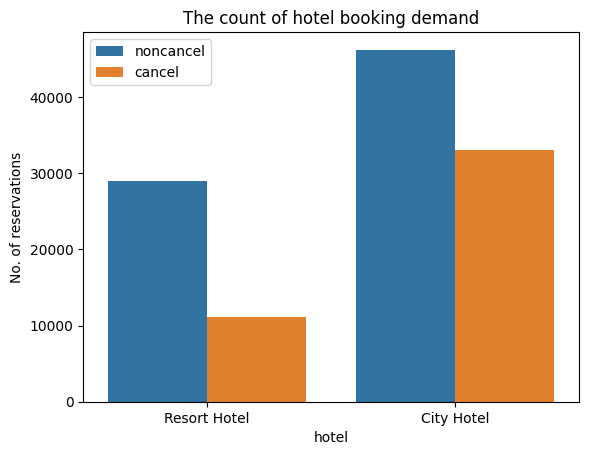

In [7]:
sns.countplot(data=df,x="hotel",hue="is_canceled")
plt.xlabel("hotel")
plt.ylabel("No. of reservations")
plt.legend(["noncancel","cancel"])
plt.title("The count of hotel booking demand")
plt.show()

1.The number of non-canceled bookings is higher for both hotel types.

2.The City Hotel should prioritize addressing cancellations, as the number of cancellations is high relative to the original bookings.

In [8]:
grouped_counts = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='count')
grouped_counts

,hotel,is_canceled,count
0,City Hotel,0,46228
1,City Hotel,1,33098
2,Resort Hotel,0,28938
3,Resort Hotel,1,11122


In [9]:
df['customer_type']=df['customer_type'].astype(str)
df['is_canceled'] = df['is_canceled'].astype(str)

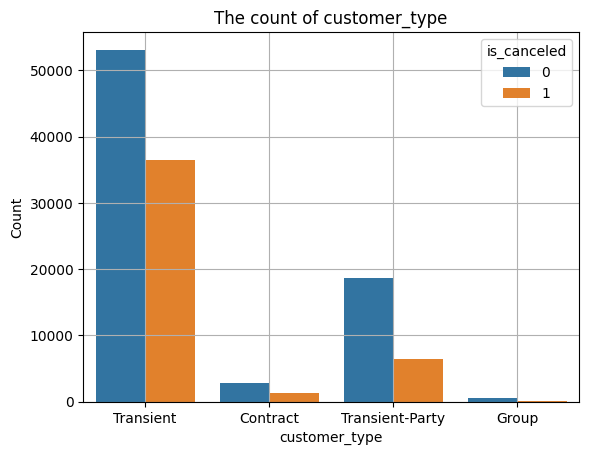

In [10]:
sns.countplot(data=df,x="customer_type",hue="is_canceled")
plt.title("The count of customer_type")
plt.xlabel("customer_type")
plt.ylabel("Count")
plt.grid()
plt.show()

Key Insights:

Group bookings have the highest retention rate.

Transient bookings have the highest cancellation rate.

Contract bookings show a significant proportion of cancellations.

Transient-Party bookings have a strong retention rate but can improve further.


In [11]:
grouped_counts = df.groupby(['customer_type', 'is_canceled']).size().reset_index(name='count')
grouped_counts

,customer_type,is_canceled,count
0,Contract,0,2814
1,Contract,1,1262
2,Group,0,518
3,Group,1,59
4,Transient,0,53099
5,Transient,1,36514
6,Transient-Party,0,18735
7,Transient-Party,1,6385


 Investigate how far in advance most bookings are made and if there are trends based on lead time.

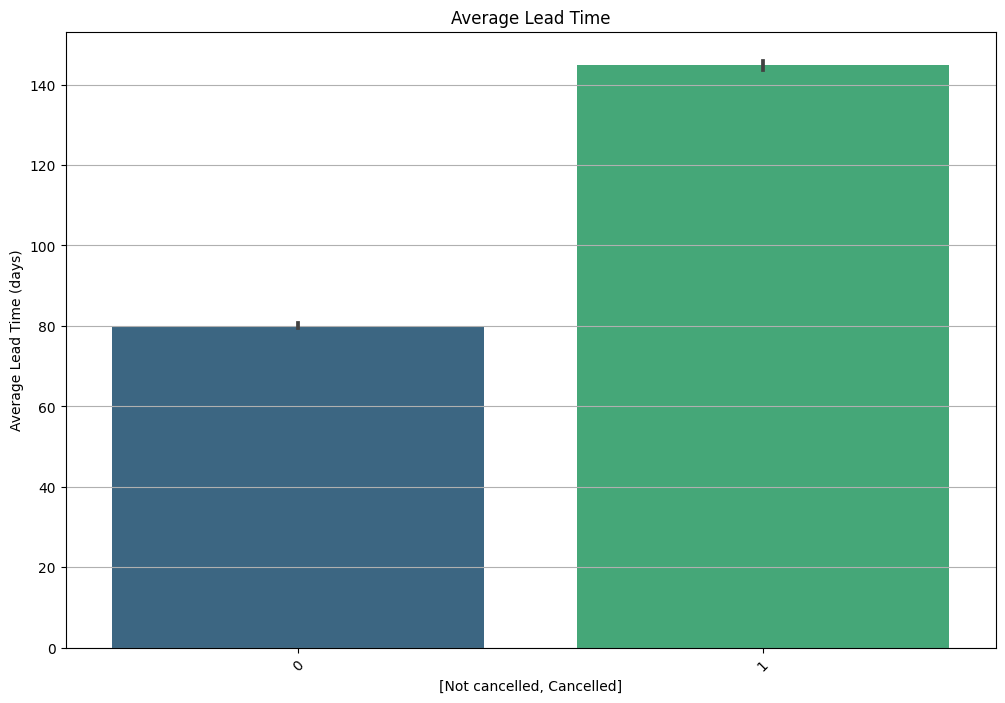

In [12]:
plt.figure(figsize=(12, 8))  # Set the figure size

sns.barplot(data=df, x='is_canceled', y='lead_time', palette='viridis')
plt.title('Average Lead Time')
plt.xlabel('[Not cancelled, Cancelled]')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Seasonal Booking Trends: Identify seasonal patterns in hotel bookings (e.g., peak seasons, low seasons).

Booking Volume by Month and Year:: Analyze the number of bookings made each month and how it varies across different years.

In [13]:
df['arrival_date_year']=df['arrival_date_year'].astype(str)
df['arrival_date_month'] = df['arrival_date_month'].astype(str)

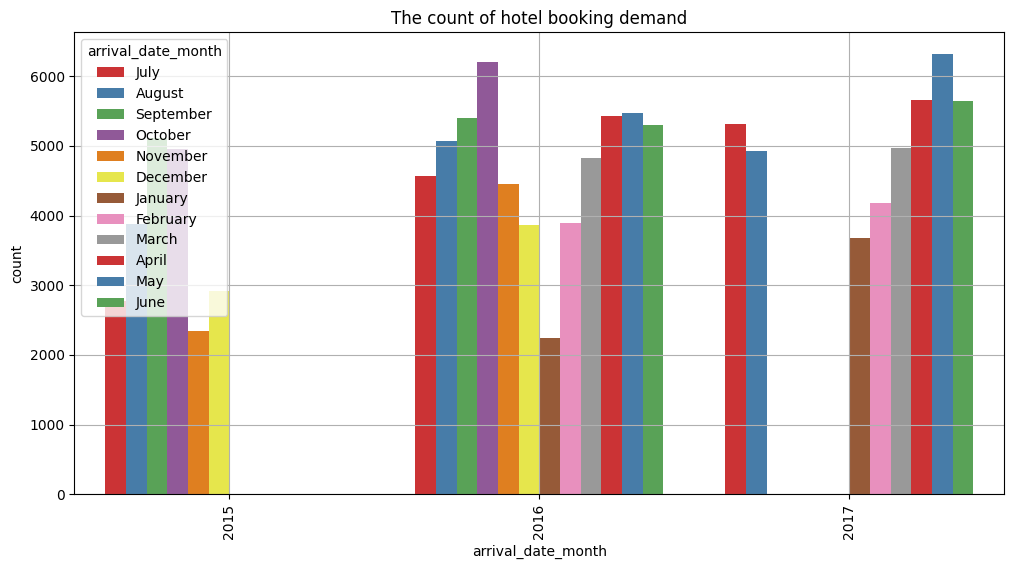

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x="arrival_date_year",hue="arrival_date_month", palette="Set1")
plt.xticks(rotation=90)
plt.title("The count of hotel booking demand")
plt.xlabel("arrival_date_month")
plt.ylabel("count")
plt.grid()
plt.show()

Peak Booking Months:

2015: September (5,114), October (4,957)

2016: October (6,203), May (5,478), April (5,428)

2017: May (6,313), April (5,661), June (5,647)

Lowest Booking Months:

2015: November (2,340), July (2,776)

2016: January (2,248), November (4,454)

2017: January (3,681), February (4,177)

Year-over-Year Trends:

Increasing Trend: Notable increase in bookings in May and October over the years.

Consistent Peaks: August and July consistently show high booking counts across all years.


Key Insights:

High Demand Periods: October and May are consistently high-demand months.

Growth: There is a general increase in bookings from 2015 to 2017.

Strategic Planning: Focus marketing and resource allocation on peak months for better yield.


In [16]:
grouped_counts = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')
grouped_counts

,arrival_date_year,arrival_date_month,count
0,2015,August,3885
1,2015,December,2920
2,2015,July,2776
3,2015,November,2340
4,2015,October,4957
5,2015,September,5114
6,2016,April,5428
7,2016,August,5063
8,2016,December,3860
9,2016,February,3891


Calculate cancellation rates based on the number of special requests

In [17]:
df['is_canceled'] = df['is_canceled'].astype(int)
unique_req=df['total_of_special_requests'].unique()


In [18]:
# Calculate cancellation rates based on the number of special requests
special_requests_cancel_rates = df.groupby('total_of_special_requests')['is_canceled'].mean() * 100
special_requests_cancel_rates
# .mean(): This calculates the mean of the is_canceled column for each group. The mean here represents the average value of is_canceled for each group 
# of special requests. Since is_canceled is binary (0 for not canceled, 1 for canceled), the mean gives the proportion of canceled bookings in each group
# For example, if there are 10 bookings with 2 special requests and 3 of them are canceled, the mean for that group would be 0.3 (or 30%).

total_of_special_requests
0    47.720356
1    22.017879
2    22.092844
3    17.861434
4    10.588235
5     5.000000
Name: is_canceled, dtype: float64

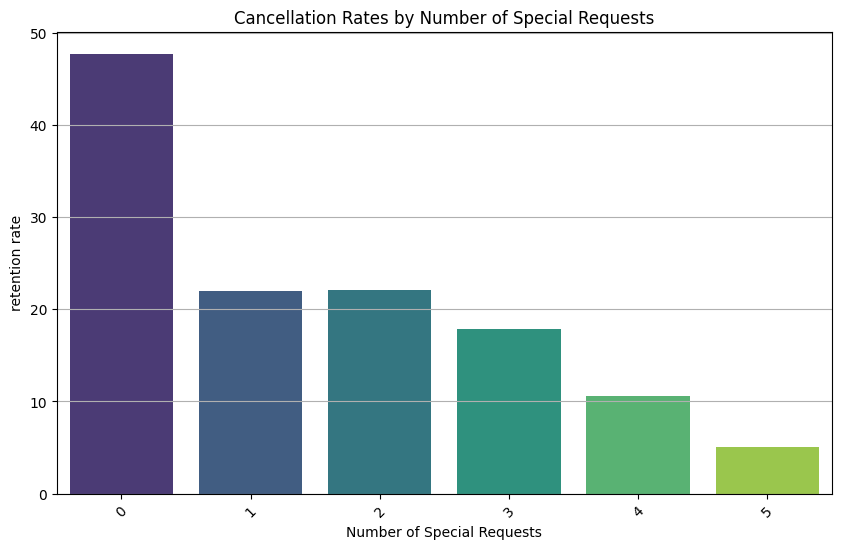

In [19]:
# Visualize cancellation rates by number of special requests
plt.figure(figsize=(10, 6))
sns.barplot(x=special_requests_cancel_rates.index, y=special_requests_cancel_rates.values, palette='viridis')
plt.title('Cancellation Rates by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('retention rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Special Requests and Cancellations:

Higher average number of special requests is associated with lower cancellation rates.

Bookings with an average of approximately 47.72 special requests have the lowest cancellation rate.
    
As the number of special requests decreases, the cancellation rate tends to increase.
    
Bookings with around 5 special requests have the highest cancellation rate.

Calculate booking counts by market segment and distribution channel

In [20]:
booking_counts = df.groupby(['market_segment', 'distribution_channel']).size().unstack()
booking_counts = booking_counts.fillna(0)
booking_counts

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
market_segment,,,,,
Aviation,227.0,0.0,0.0,10.0,0.0
Complementary,89.0,576.0,0.0,78.0,0.0
Corporate,4788.0,172.0,0.0,335.0,0.0
Direct,90.0,12276.0,1.0,237.0,1.0
Groups,1228.0,1472.0,0.0,17111.0,0.0
Offline TA/TO,212.0,16.0,45.0,23946.0,0.0
Online TA,43.0,133.0,147.0,56153.0,0.0


<Figure size 1400x800 with 0 Axes>

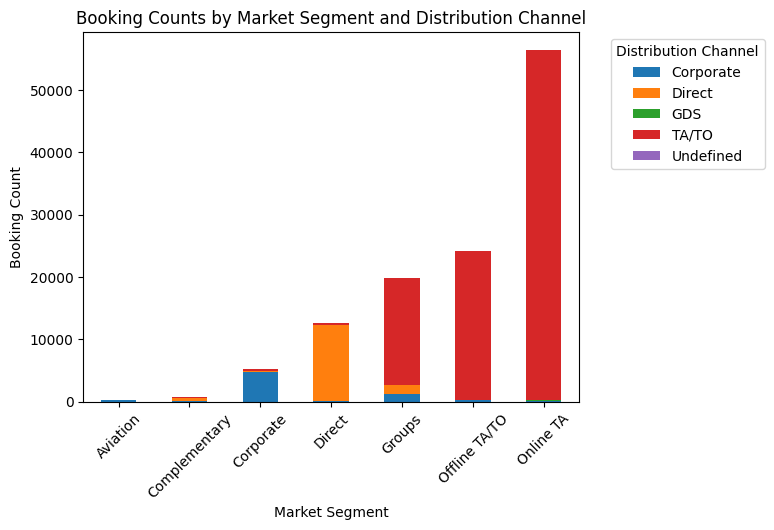

In [21]:
# Plotting a stacked bar chart
plt.figure(figsize=(14, 8))
booking_counts.plot(kind='bar', stacked=True)
plt.title('Booking Counts by Market Segment and Distribution Channel')
plt.xlabel('Market Segment')
plt.ylabel('Booking Count')
plt.xticks(rotation=45)
plt.legend(title='Distribution Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
Dominant Channels:

TA/TO is the dominant channel for Groups, Offline TA/TO, and Online TA market segments.

Direct channel is heavily utilized by Direct and Complementary market segments.

Corporate channel is primarily used by the Corporate market segment.


Minor Channels:

GDS channel sees minimal usage across all segments.

Undefined channel has negligible usage.

Strategic Focus:

Marketing and resource allocation should be tailored to leverage the dominant channels for each market segment to optimize bookings and efficiency.

Comparative ADR between Hotel Types And Room Types:




Compare ADR trends between Resort Hotel and City Hotel categories to understand pricing in different months.



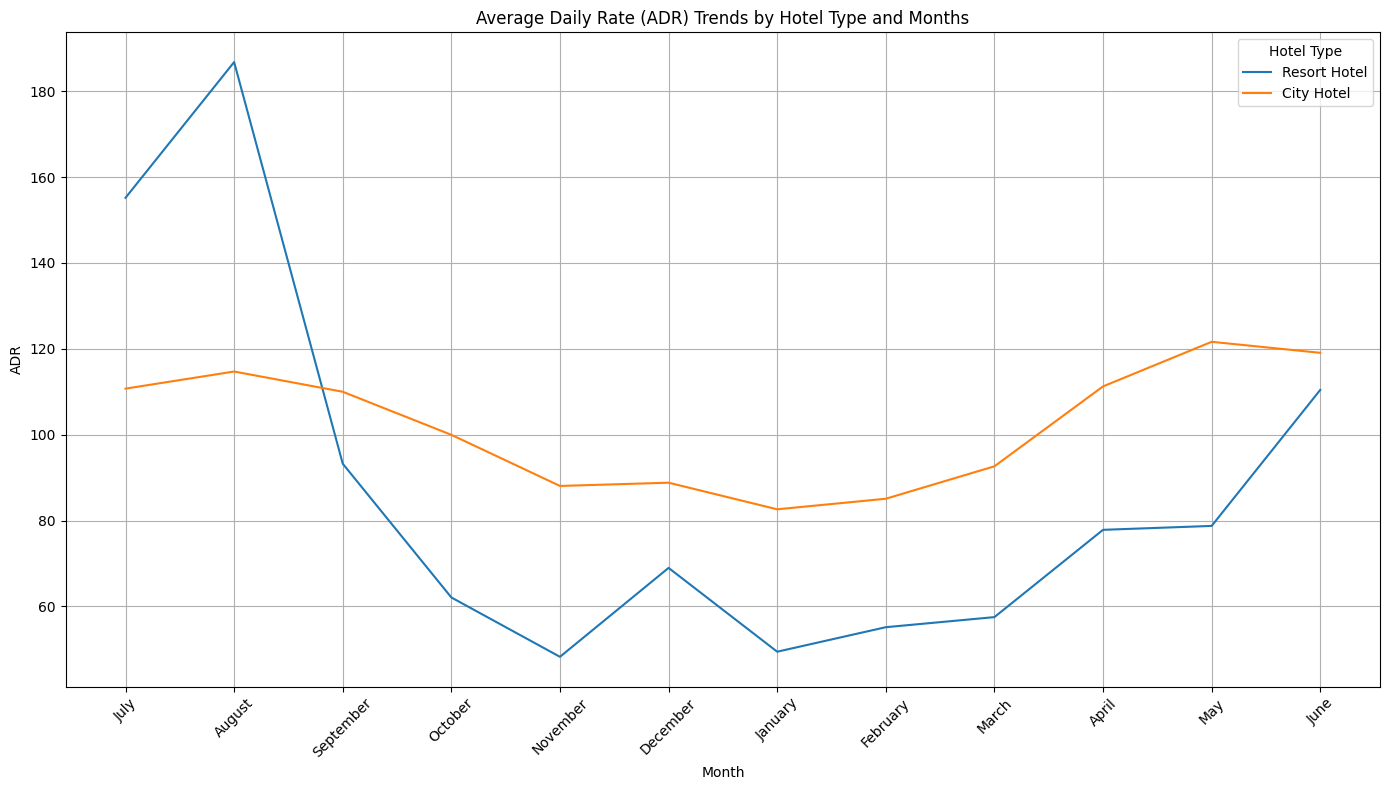

In [22]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='arrival_date_month', y='adr', hue='hotel',ci=None)
plt.title('Average Daily Rate (ADR) Trends by Hotel Type and Months')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

As we can see average daily rate for city hotel is not having little variation across all the months.

And for Resort hotel type we can see average daily rate hits peak during july to august

Compare ADR trends between Resort Hotel and City Hotel categories to understand pricing in different room types.

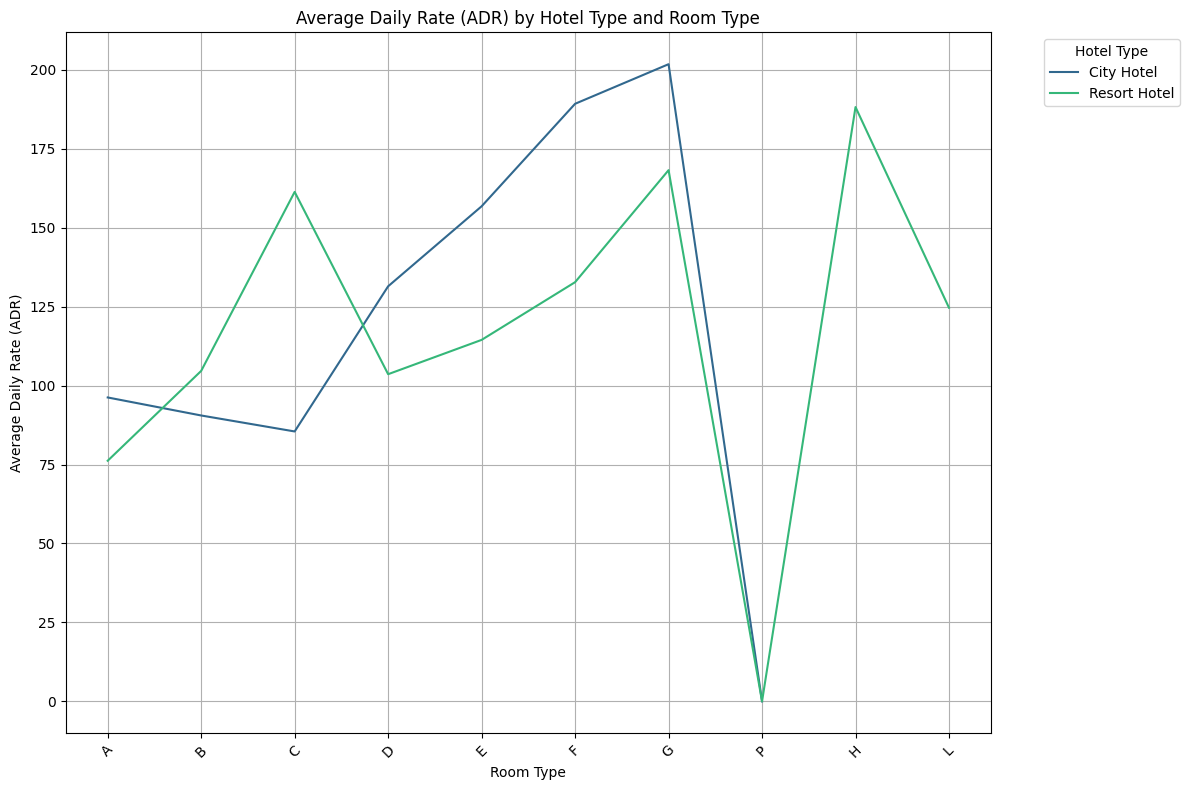

In [23]:
# Group by hotel type and room type, calculate mean ADR
adr_by_room_type = df.groupby(['hotel', 'reserved_room_type'])['adr'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=adr_by_room_type, x='reserved_room_type', y='adr', hue='hotel', palette='viridis')
plt.title('Average Daily Rate (ADR) by Hotel Type and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Hotel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The average daily price for city and resort hote types is minimum for room Type-P

City hotel has highest adr for room type-G

Resort hotel has highest adr for room type-H

Compare ADR trends between Resort Hotel and City Hotel categories to understand pricing in different months and room type.

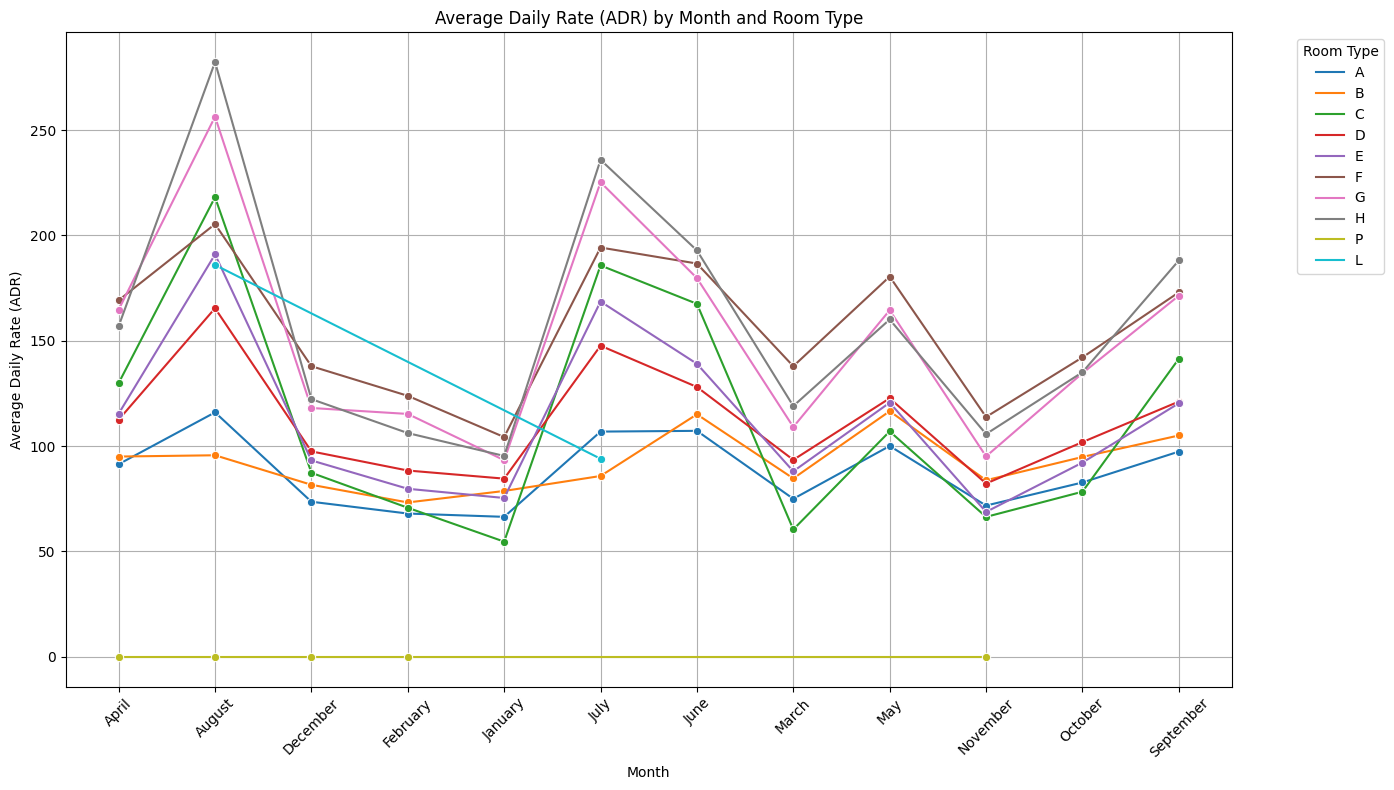

In [24]:
adr_by_month_roomtype = df.groupby(['arrival_date_month', 'reserved_room_type'])['adr'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=adr_by_month_roomtype, x='arrival_date_month', y='adr', hue='reserved_room_type', marker='o')
plt.title('Average Daily Rate (ADR) by Month and Room Type')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Investigate patterns of is_repeated_guest to identify loyal customers and their booking behaviors.  give code

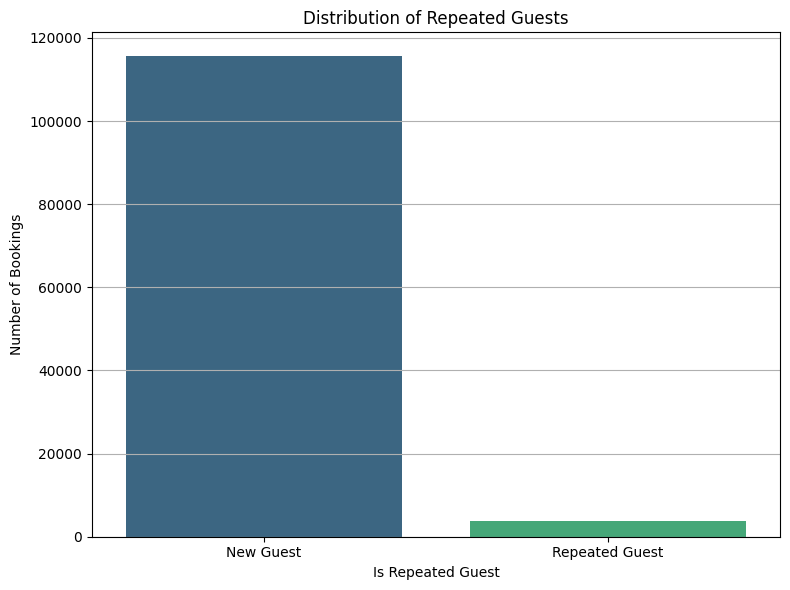

In [25]:
# Check the distribution of repeated guests
repeated_guest_counts = df['is_repeated_guest'].value_counts().reset_index()
repeated_guest_counts.columns = ['is_repeated_guest', 'counts']

# Plotting the distribution of repeated guests
plt.figure(figsize=(8, 6))
sns.barplot(data=repeated_guest_counts, x='is_repeated_guest', y='counts', palette='viridis')
plt.title('Distribution of Repeated Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Number of Bookings')
plt.xticks([0, 1], ['New Guest', 'Repeated Guest'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


As we can see that more than 90% of the bookings are new bookings . So we need to focus on customer satisfaction and retention